In [123]:
import torch
from torch.utils.data import DataLoader

import relg

In [204]:
dataset = relg.SynthDataLoader(
    "datasets", "train")

In [492]:
data = iter(dataset)

In [500]:
d = next(data)
inputs = d["inputs"]

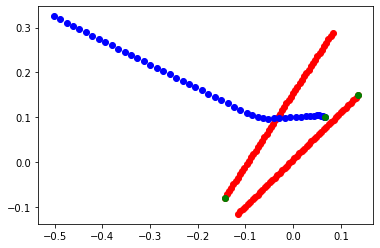

In [501]:
import matplotlib.pyplot as plt

plt.plot(inputs[:, 0, 0], inputs[:, 0, 1], "o", color="red")
plt.plot(inputs[:, 1, 0], inputs[:, 1, 1], "o", color="red")
plt.plot(inputs[:, 2, 0], inputs[:, 2, 1], "o", color="blue")

plt.plot(inputs[0, 0, 0], inputs[0, 0, 1], "o", color="green")
plt.plot(inputs[0, 1, 0], inputs[0, 1, 1], "o", color="green")
plt.plot(inputs[0, 2, 0], inputs[0, 2, 1], "o", color="green")

In [502]:
model = torch.load("models/encoder")

In [503]:
model.eval()
with torch.no_grad():
    edges_p, edges_enc, _ = model(inputs[None, ...].cuda())

edges_p = edges_p.cpu().detach()
edges_enc = edges_enc.cpu().detach()

In [504]:
import numpy as np
ep = np.argmax(edges_p, axis=-1)
ec = np.argmax(edges_enc, axis=-1)

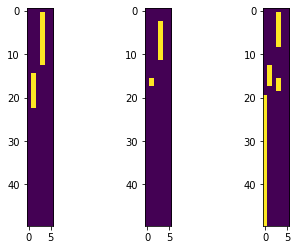

In [505]:
plt.subplot(131)    
plt.imshow(d["edges"])

plt.subplot(132)
plt.imshow(ep[0])

plt.subplot(133)
plt.imshow(ec[0])

In [506]:
full_edge_count = 0.
correct_edges = 0.
edge_count = 0.
correct_0_edges = 0.
edge_0_count = 0.
correct_1_edges = 0.
edge_1_count = 0.
correct = num_predicted = num_gt = 0

edge_count += ep[0].numel()
full_edge_count += d["edges"].numel()
correct_edges += ((ep[0] == d["edges"])).sum().item()
edge_0_count += (d["edges"] == 0).sum().item()
edge_1_count += (d["edges"] == 1).sum().item()
correct_0_edges += ((ep[0] == d["edges"])*(d["edges"] == 0)).sum().item()
correct_1_edges += ((ep[0] == d["edges"])*(d["edges"] == 1)).sum().item()
correct += (ep[0]*d["edges"]).sum().item()
num_predicted += ep[0].sum().item()
num_gt += d["edges"].sum().item()
prec = correct / (num_predicted + 1e-8)
rec = correct / (num_gt + 1e-8)
f1 = 2*prec*rec / (prec+rec+1e-6)

f1

0.7096769610408781